## Observations and Insights 

DUPLICATES
    Once the data was merged and filtered, there was only one line of data that was a duplicate row of information (Mouse ID g989)


BAR CHARTS
    More data was collected for mice categorized under the Ramicane and Capomulin drug regimens in regards to timepoints. The least amount of data collected through timepoints were mice categorized under Propriva.
 
 
PIE CHART
    The pie charts show the gender distribution of all the mice in the data set. There is a slightly higher amount of Male mice, but by the smallest difference. The gender distribution information can be used to break down the tumor size of each mice, per drug regimen to see how the drug regimens affected the gender groups as a whole. 
    
    
QUARTILES, OUTLIERS & BOX PLOTS
    The calculations visually show that there was only one outlier in the entire data, specifically with a mouse under Naftisolin. This is great because it shows that there is more control for the variables that were set in place. The data can actually be used to make valid conclusions since it is not scattered. 
    Additional calculations could be run to display the breakdown of all of the values by simply sorting the data. Those values can then be compared to the upper and lower outlier limits to determine which data is close/past in order to further access if the data is within range or not.
    
SCATTER PLOT
    The more the mice weighed, the heavier the tumor was. I also added an age color bar, and it shows that age did not directly affect the weight of the tumor or the weight of the mouse.
    
    
Overall, it seems that the most effective drug regimens (compared to the four) were Capomulin and Ramicane. The data below also shows that a main reason why the tumor volumes could have been high for Capomulin correlated with the weight of that individual mouse. 

A good chart to run would be a seperate analysis to verify the weight of the mice in the entire study. Considering Capomulin had higher numbers for tumor volume due to higher weight in mice, the data could be slightly skewed if not all drug regimens had the same amount of test subjects with similar weights to compare. (Ie. if all the mice in Ramicane weighed less, the numbers might reflect much lower when compared to other drug regimens)

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,
                how = 'outer', on ='Mouse ID')
                         
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [10]:
# Checking the number of mice.
num_of_mice = combined_data["Mouse ID"].drop_duplicates()
len(num_of_mice)

249

In [13]:
# Drop duplicate values / clean the data
combined_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"],
                            keep = False, inplace = True )

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_data.describe()

grouped_drug_regime = combined_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_df = pd.DataFrame({
                            "Mean": round(grouped_drug_regime["Tumor Volume (mm3)"].mean(),2),
                            "Median": round(grouped_drug_regime["Tumor Volume (mm3)"].median(),2),
                            "Variance": round(grouped_drug_regime["Tumor Volume (mm3)"].var(),2),
                            "Standard Deviation": round(grouped_drug_regime["Tumor Volume (mm3)"].std(),2),
                            "SEM": round(grouped_drug_regime["Tumor Volume (mm3)"].sem(),2)
                            })
tumor_volume_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_agg = combined_data.groupby("Drug Regimen").aggregate(['mean', 'median', 'var', 'std','sem'])
round(tumor_vol_agg["Tumor Volume (mm3)"],2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

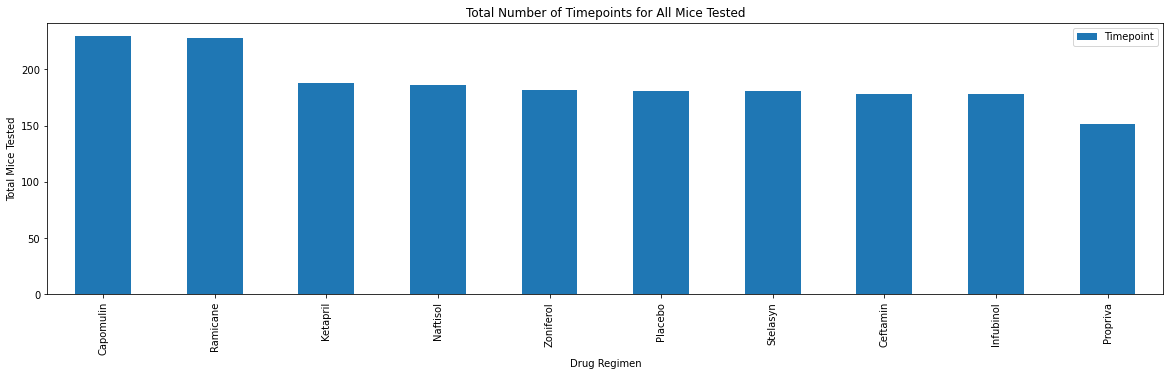

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#combined_data["Drug Regimen"].value_counts().plot(kind="bar", color = "skyblue")

timepoint_regimen_df = pd.DataFrame({
                            "Timepoint": grouped_drug_regime["Timepoint"].count() 
                            }).sort_values(by = "Timepoint", ascending = False)
               
bar_plot_pd = timepoint_regimen_df.plot(kind="bar", figsize=(20,5))
bar_plot_pd.set_title('Total Number of Timepoints for All Mice Tested')
bar_plot_pd.set_ylabel('Total Mice Tested')
plt.show()
plt.tight_layout()

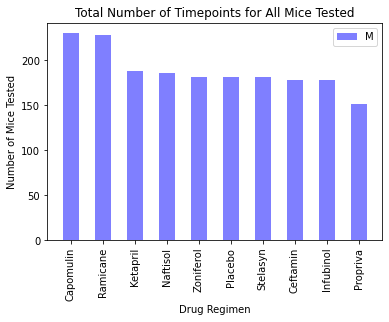

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_regimen_plt = timepoint_regimen_df.reset_index()

drug_regimen = timepoint_regimen_plt["Drug Regimen"]
timepoint = timepoint_regimen_plt["Timepoint"]

x_axis = np.arange(len(drug_regimen))
tick_location = [value for value in x_axis]

plt.xticks(tick_location, drug_regimen)
plt.xticks(rotation = 90)
plt.bar(drug_regimen, timepoint, color ='blue', alpha = .5, align="center", width = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.legend("Mice", loc = "upper right")
plt.title("Total Number of Timepoints for All Mice Tested")
plt.show()

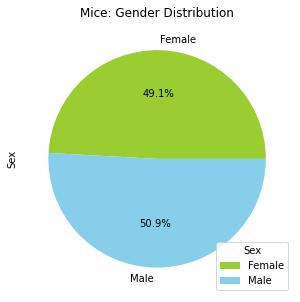

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = combined_data.groupby("Sex")
gender_num = gender_df["Sex"].count()

colors = ["yellowgreen", "skyblue"]
pie_sex =  gender_num.plot(kind="pie", colors=colors, autopct='%1.1f%%', figsize=(20,5))

plt.title("Mice: Gender Distribution")
plt.legend(title="Sex", loc="lower right")
plt.show()

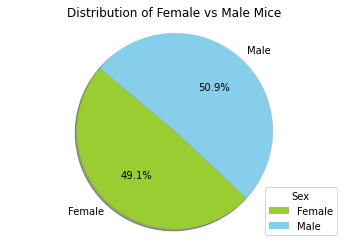

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = ["Female", "Male"]

colors = ["yellowgreen", "skyblue"]

plt.pie(gender_num, colors = colors,labels = gender_label,
        autopct = "%1.1f%%", shadow = True, startangle = 140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Distribution of Female vs Male Mice")
plt.legend(title="Sex", loc="lower right")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Creates table with select columns
new_df = combined_data.filter(['Mouse ID','Timepoint', 'Drug Regimen'], axis=1)

#Takes timepoint.max() and groups by Mouse ID
grouped_mouseid_df = new_df.groupby(["Mouse ID"]).max()

#merging Mouse ID and Timepoint.max from above, to get tumor volume on that row
quartiles_combined_data = pd.merge(grouped_mouseid_df, study_results,
                        how = 'left', on =['Mouse ID', 'Timepoint'])

select_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_filtered_df = quartiles_combined_data.loc[quartiles_combined_data["Drug Regimen"].isin(select_drugs)]

final_filtered_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,67.973419,2
1,a251,45,Infubinol,65.525743,1
3,a275,45,Ceftamin,62.999356,3
6,a411,45,Ramicane,38.407618,1
7,a444,45,Ramicane,43.047543,0
...,...,...,...,...,...
239,y769,45,Ceftamin,68.594745,4
240,y793,45,Capomulin,31.896238,2
241,y865,45,Ceftamin,64.729837,3
245,z578,45,Ramicane,30.638696,0


In [42]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
quartiles = final_filtered_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq)
print(" ")
print('\033[1m' + "QUARTILES" + '\033[0m')
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")
print(" ")

lower_bound = round(lowerq - (1.5*iqr))
upper_bound = round(upperq + (1.5*iqr))
print('\033[1m' + "OUTLIERS" + '\033[0m')
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(" ")

 
QUARTILES
The lower quartile is: 37.19
The upper quartile is: 59.93
The interquartile range is: 23
The the median is: 45.0 
 
OUTLIERS
Values below 3 could be outliers.
Values above 94 could be outliers.
 


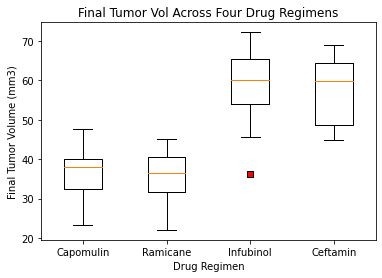

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers = []
for drug in select_drugs:
     temp = final_filtered_df.loc[final_filtered_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
     outliers.append(temp)

# Outlier color format
red_square = dict(markerfacecolor='r', marker='s')
    
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Vol Across Four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(outliers,flierprops=red_square)
ax1.set_xticklabels(select_drugs)
plt.show()

## Line and Scatter Plots

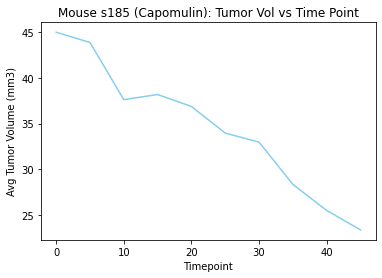

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
capomulin_data = combined_data.loc[combined_data["Mouse ID"] == "s185" ]

capomulin_line = plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], color = "skyblue")
plt.title("Mouse s185 (Capomulin): Tumor Vol vs Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

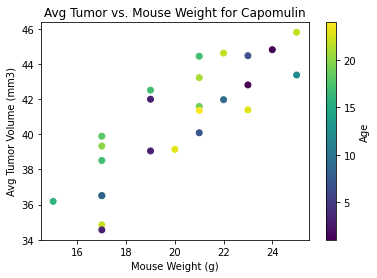

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_loc = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin"]

grouped_capomulin_mouseid= capomulin_loc.groupby(["Mouse ID"]).mean()
grouped_capomulin_mouseid.reset_index()

plt.scatter(grouped_capomulin_mouseid["Weight (g)"], grouped_capomulin_mouseid["Tumor Volume (mm3)"], c=grouped_capomulin_mouseid["Age_months"])
plt.title("Avg Tumor vs. Mouse Weight for Capomulin")

clb = plt.colorbar()
clb.set_label("Age")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.show()

** Age added for visuals on added information

## Correlation and Regression

 
The correlation coefficient between weight and average tumor volume is 0.84.
 


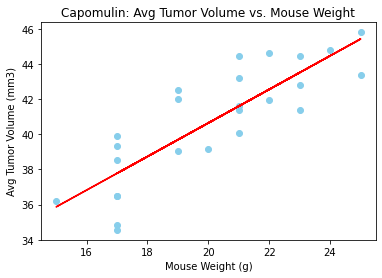

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#CORRELATION COEFFICIENT
correlation = st.pearsonr(grouped_capomulin_mouseid["Weight (g)"], grouped_capomulin_mouseid["Tumor Volume (mm3)"])
print(" ")
print(f"The correlation coefficient between weight and average tumor volume is {round(correlation[0],2)}.")
print(" ")

#REGRESSION
x_values = grouped_capomulin_mouseid["Weight (g)"]
y_values = grouped_capomulin_mouseid["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
                                     
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Capomulin: Avg Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()